# Potential Flow Around a Rotating Cylinder

This notebook demonstrates the animation of velocity field of a rotating cylinder with various rotational speed in a uniform flow of 25 m/s using **potential flow theory**.

---

In potential flow, a rotating cylinder in a uniform stream is modeled by superposing:

- **Uniform flow**:  $$F(z) = U_\infty z$$
- **Doublet**: $$F(z) = \frac{D}{z}$$ where $D$ resembles the strength of the dipole flow
- **Vortex (rotation)**: $$F(z) = -\frac{\Gamma}{2\pi} i \ln z$$

Thus the complex analytical function for flow over a rotating cylinder is given as:

$$F(z) = U_\infty \left( z+ \frac{R^2}{z}\right)+ i \frac{\Gamma}{2\pi} \ln \frac{z}{R}$$

Here, the signs are important, $U_\infty$ is positive for left to right flow, $\Gamma$ is positive for anti-clockwise by the sign of polar angle.
### Stream function:

$$\psi(r,\theta) = U_\infty \left(r - \frac{R^2}{r} \right) \sin \theta + \frac{\Gamma}{2\pi}\ln \frac{r}{R}$$

### Velocity components in polar coordinates:

$$U_r = U_\infty \left(1 - \frac{R^2}{r^2} \right) \cos \theta$$

$$U_\theta = -U_\infty \left(1+ \frac{R^2}{r^2} \right)\sin \theta - \frac{\Gamma}{2\pi r}$$

### Stagnation points ($U_r=0, U_\theta=0$)
At $r=R$, $U_r = 0$ and $U_\theta = 0 = -2U_\infty \sin \theta  - \frac{\Gamma}{2\pi R}  \implies \sin \theta = -\frac{\Gamma}{4 \pi R U_\infty}$

In [25]:
# 📦 Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.interpolate import interp1d
from IPython.display import HTML
import matplotlib as mpl

# Set LaTeX-style fonts (without using external LaTeX)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

In [26]:
# 🧮 Flow parameters and grid
U_inf = 25.0          # Free stream velocity
R = 0.5              # Radius of the cylinder
N = 100             #RPM
Omega = 2*np.pi*N/60.  #angular velocity in rad/s
Gamma = 2 * np.pi * R**2 * Omega  # Circulation (rotation strength)

x = np.linspace(-4, 4, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)


In [27]:
# 🔁 Velocity field calculation
def streamFunction(X, Y, Gamma):
    r = np.sqrt(X**2 + Y**2)
    theta = np.arctan2(Y, X)
    psi = U_inf * (r - R**2 / r) * np.sin(theta) + Gamma / (2 * np.pi) * np.log(r / R)
    return psi

def compute_velocity_field(r, R, theta,Gamma):
    u_r = U_inf * (1 - R**2 / r**2) * np.cos(theta)
    u_theta = -U_inf * (1 + R**2 / r**2) * np.sin(theta) - Gamma/(2*np.pi*r)

    return u_r, u_theta


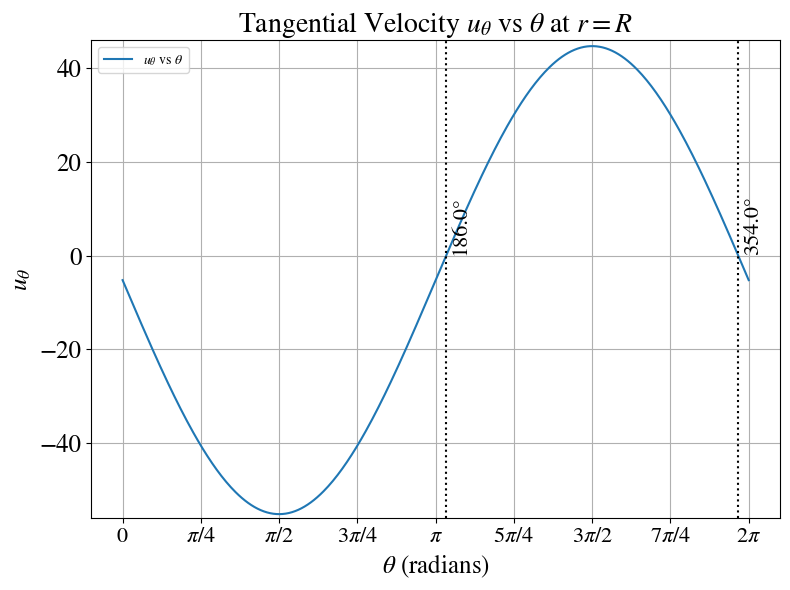

[array(3.24650659), array(6.17827033)]


In [28]:
Theta = np.linspace(0,2*np.pi,400)
uR, uThta = compute_velocity_field(R,R, Theta,Gamma)

# Find zero crossings in u_theta
sign_changes = np.where(np.diff(np.sign(uThta)))[0]
zero_thetas = []
for idx in sign_changes:
    x = Theta[idx:idx+2]
    y = uThta[idx:idx+2]
    f = interp1d(y, x)
    zero_theta = f(0.0)
    zero_thetas.append(zero_theta)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Theta, uThta, label=r'$u_\theta$ vs $\theta$')

# Add vertical dotted lines and degree annotations
for zero_theta in zero_thetas:
    plt.axvline(x=zero_theta, color='k', linestyle='dotted')
    theta_deg = np.degrees(zero_theta)
    plt.annotate(f"{theta_deg:.1f}°", xy=(zero_theta, 0), xytext=(zero_theta + 0.05, 0.05),
                 rotation=90, fontsize=16, verticalalignment='bottom')

# X-axis ticks at π/4 intervals
# Set x-ticks at pi/4 intervals from 0 to 2pi
xticks = np.arange(0, 2 * np.pi + 0.01, np.pi / 4)
xtick_labels = [
    r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$',
    r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$']
plt.xticks(xticks, xtick_labels,fontsize=16)
plt.ylim([-56,46])
plt.yticks(fontsize=18)
plt.xlabel(r'$\theta$ (radians)',fontsize=18)
plt.ylabel(r'$u_\theta$',fontsize=18)
plt.title(r'Tangential Velocity $u_\theta$ vs $\theta$ at $r = R$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(zero_thetas)

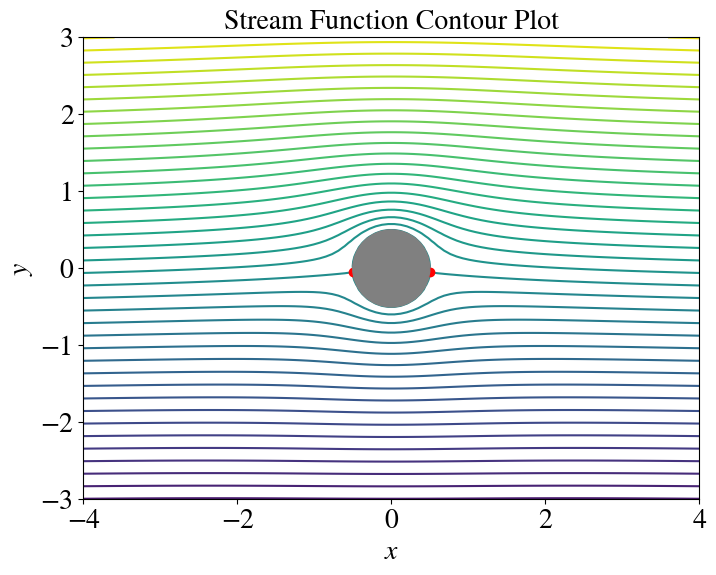

In [29]:
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
cylinder = plt.Circle((0, 0), R, color='gray', zorder=5)
ax.add_patch(cylinder)

psi = streamFunction(X, Y, Gamma)

cs = plt.contour(X, Y, psi, levels=50, cmap='viridis')

# stagnation points
plt.plot(R*np.cos(zero_thetas[0]),R*np.sin(zero_thetas[0]),'ro')
plt.plot(R*np.cos(zero_thetas[1]),R*np.sin(zero_thetas[1]),'ro')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Stream Function Contour Plot')
plt.show()
